### Lets compute distro of any function of independent RVs using conditioning and play around with Jupyter.
Let's test it out with: X+Y, X^2+Y^2, X/Y, X+Y+Z, etc.

#### 2DO: 
* make plots interactive
* use distros with different support

Easy to do on MATLAB, but must program triangular distro myself. In scipy, triangular distro comes preset in scipy.stats.triang

In [27]:
from scipy.stats import triang
from scipy.integrate import trapz
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [23]:
%matplotlib notebook 

Make sure I am dealing with the triangular distro that I have in mind. Plot it. Sample from it. Plot histogram.

In [2]:
t = np.linspace(0,1,int(1e3))

<IPython.core.display.Javascript object>


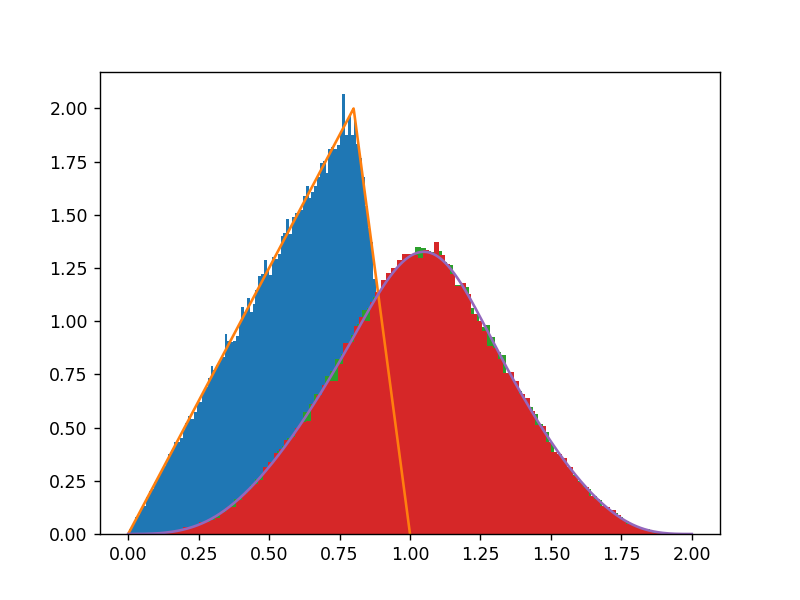

In [28]:
plt.hist(triang.rvs(.8,size=int(1e5)),bins=100,density =1 );
plt.plot(t,triang.pdf(t,.8));

Now let's define two RVs, which we will add

In [4]:
X = triang(.3);
Y = triang(.8);

Simply plot X+Y:

<IPython.core.display.Javascript object>


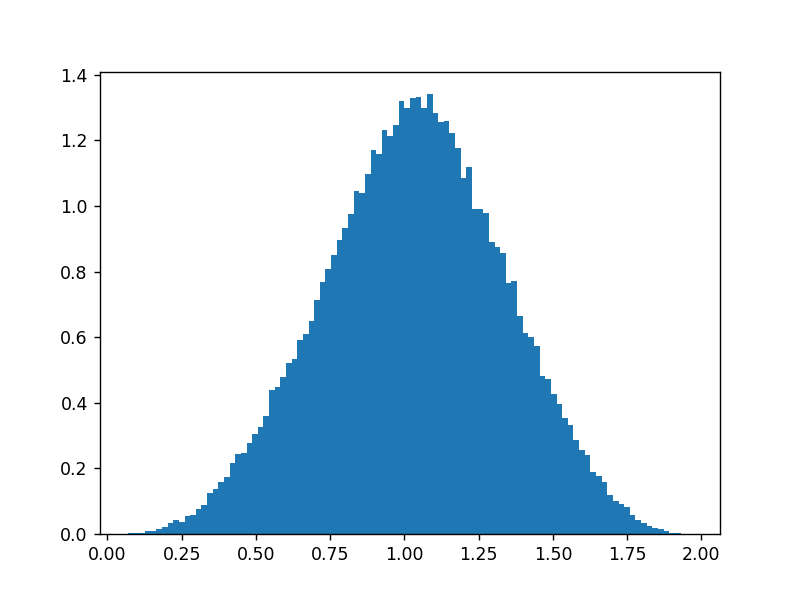

In [31]:
plt.hist(X.rvs(int(1e5))+Y.rvs(int(1e5)),bins = 100, density=1);

Now let's plot a distro of $Z=X+Y$ through the above. Must compute convolution using cumulative trapz:

$Z\sim p_z()$, where $p_z(Z)=\int f_X(t) f_Y(Z-t) dx$

### NOTE:
On MATLAB, singleton extension is atuomatic, e.g. adding column to row produces a matrix. Same here, but special steps need to be taken to transpose row to column:

In [88]:
np.array([1,2,3])[:,np.newaxis]**np.array([1,2,3])

array([[ 1,  1,  1],
       [ 2,  4,  8],
       [ 3,  9, 27]], dtype=int32)

Make sure pdf is zero outside of support:

In [12]:
X.pdf(-1.1)

0.0

z will be our mesh for Z, and we will integrate over t. Note that trapz() has 1-st argument y and 2-nd x.

In [34]:
z = np.linspace(0,2,int(1e3+2))[:,np.newaxis]

In [16]:
z.shape

(1000, 1)

In [33]:
t.shape

(1000,)

In [35]:
pz = trapz(X.pdf(t)*Y.pdf(z-t),t)

<IPython.core.display.Javascript object>


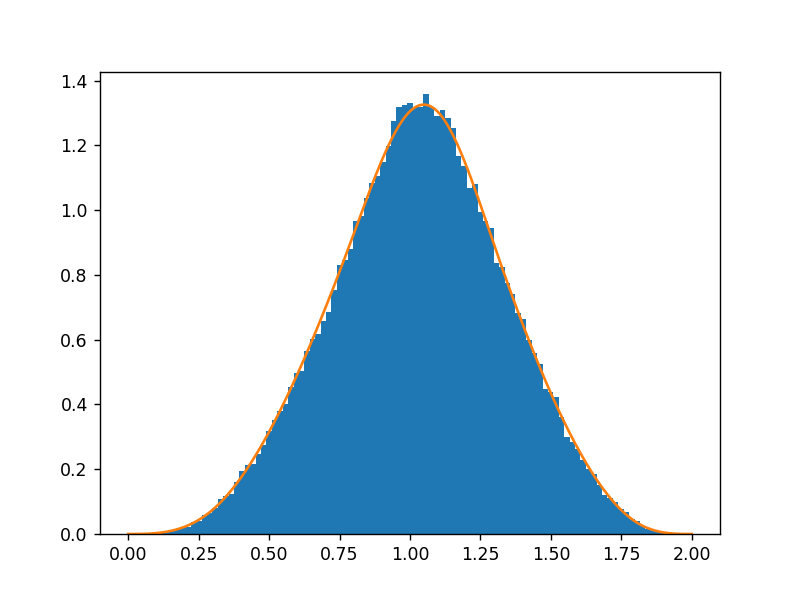

In [36]:
plt.hist(X.rvs(int(1e5))+Y.rvs(int(1e5)),bins = 100, density=1);
plt.plot(z,pz)

In [37]:
from bokeh.plotting import figure, output_file, show

In [55]:
p = figure()
p.line(z,pz)
show(p)

In [51]:
np.shape(z[:])
#np.shape(pz)

(1002,)

In [50]:
z.shape=(1002,)

In [76]:
#np.array([1,2,3]).shape = (3,1) + np.array([1,2,3]).shape = (3,1)

In [78]:
q*np.array([1,2,3])

array([[1, 2, 3],
       [2, 4, 6],
       [3, 6, 9]])

array([[2, 3, 4],
       [3, 4, 5],
       [4, 5, 6]])